In [1]:
import pandas as pd


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the dataset

In [2]:
data=pd.read_csv('/content/sales_data_with_discounts.csv')

In [ ]:
# Calculate mean, median, mode, and standard deviation for each numerical column

In [3]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
# Calculate mean, median, mode, and standard deviation for each numerical column


In [4]:
statistics = {}

for column in numerical_columns:
    stats = {
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Mode': data[column].mode()[0],  # mode might return multiple values, so take the first one
        'Standard Deviation': data[column].std()
    }
    statistics[column] = stats

In [ ]:
# # Convert the statistics dictionary to a DataFrame for better readability

In [5]:
stats_df = pd.DataFrame(statistics)
print(stats_df)


                      Volume     Avg Price  Total Sales Value  \
Mean                5.066667  10453.433333       33812.835556   
Median              4.000000   1450.000000        5700.000000   
Mode                3.000000    400.000000       24300.000000   
Standard Deviation  4.231602  18079.904840       50535.074173   

                    Discount Rate (%)  Discount Amount  Net Sales Value  
Mean                        15.155242      3346.499424     30466.336131  
Median                      16.577766       988.933733      4677.788059  
Mode                         5.007822        69.177942       326.974801  
Standard Deviation           4.220602      4509.902963     46358.656624  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

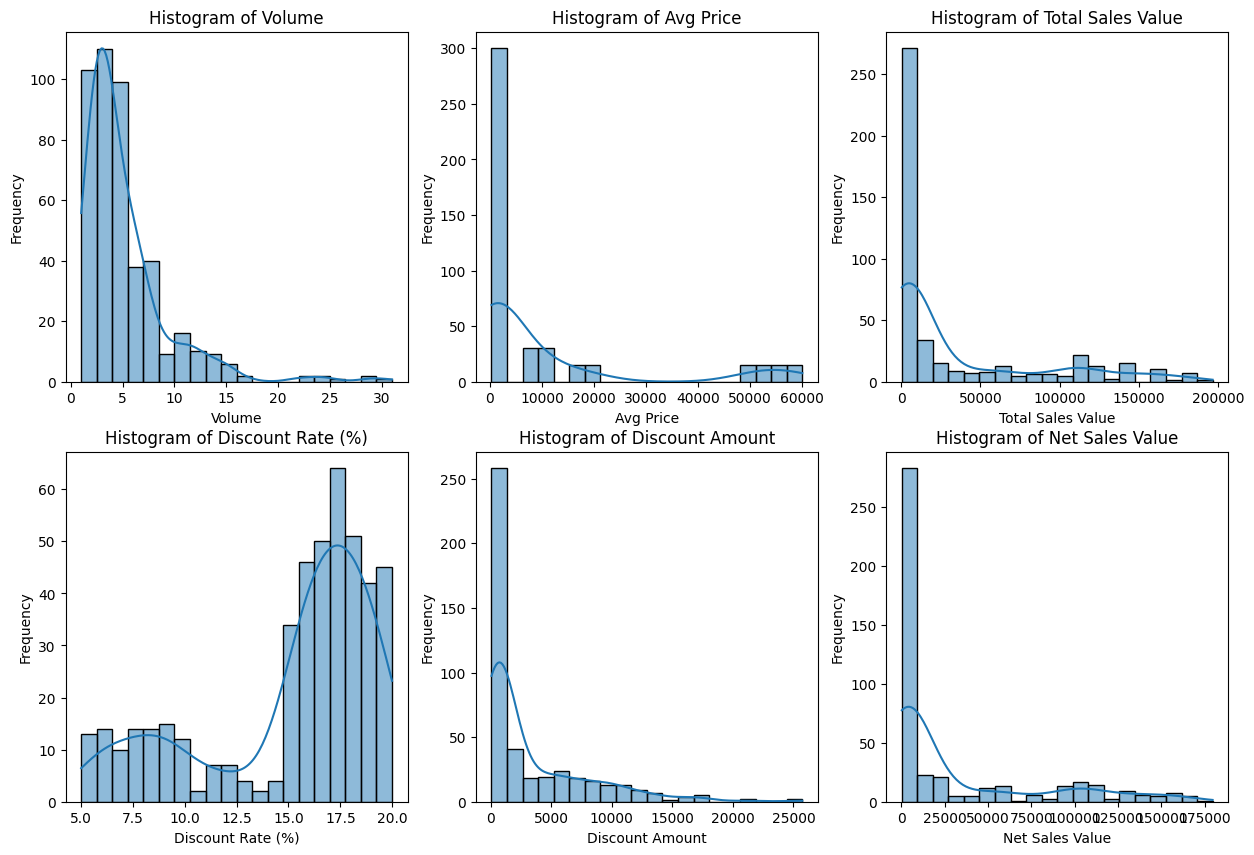

In [8]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    # Adjust subplot grid based on the number of numerical columns
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

In [10]:
plt.tight_layout
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
# Create Bar chart for numerical columns

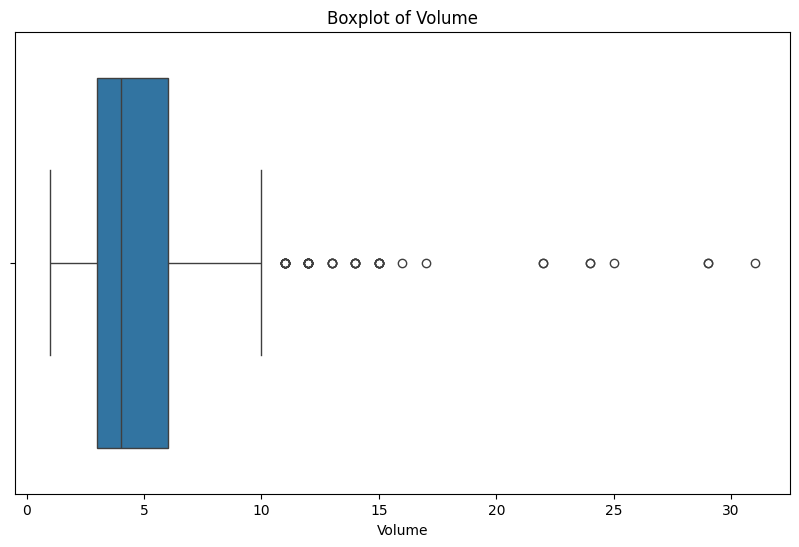

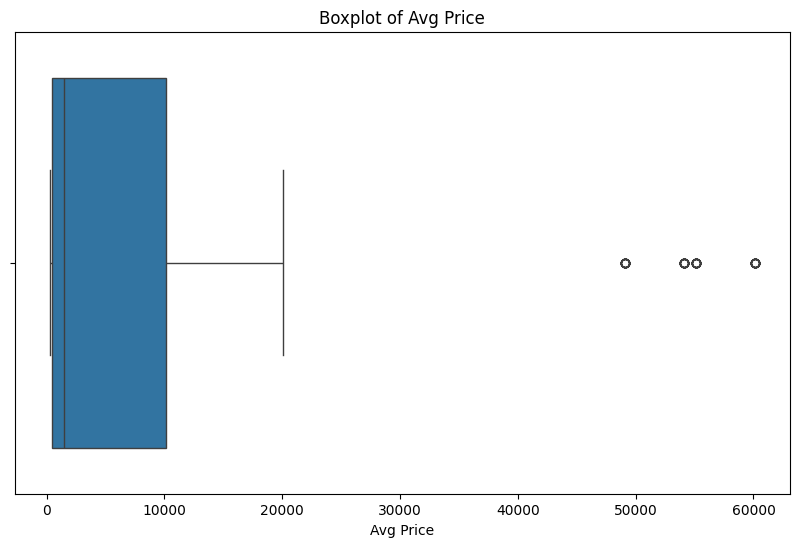

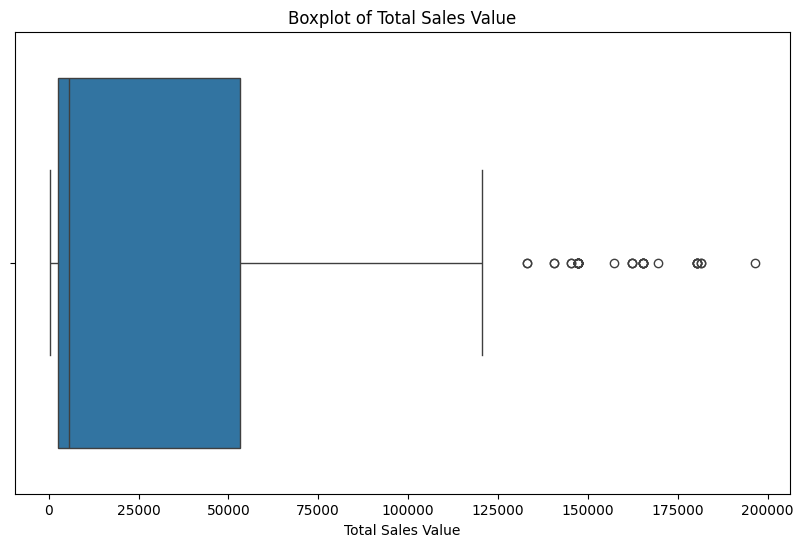

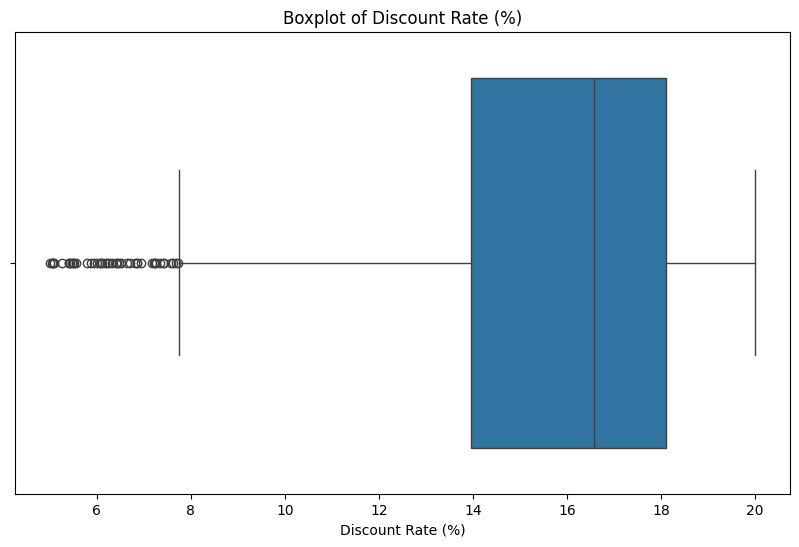

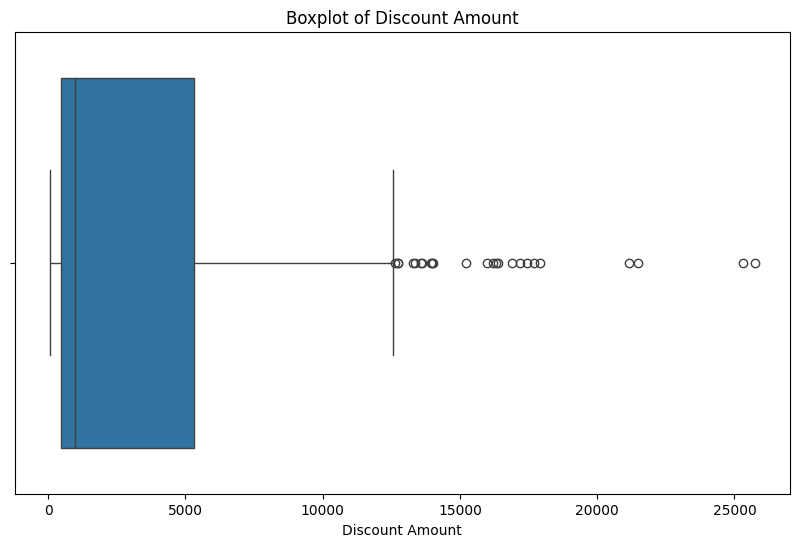

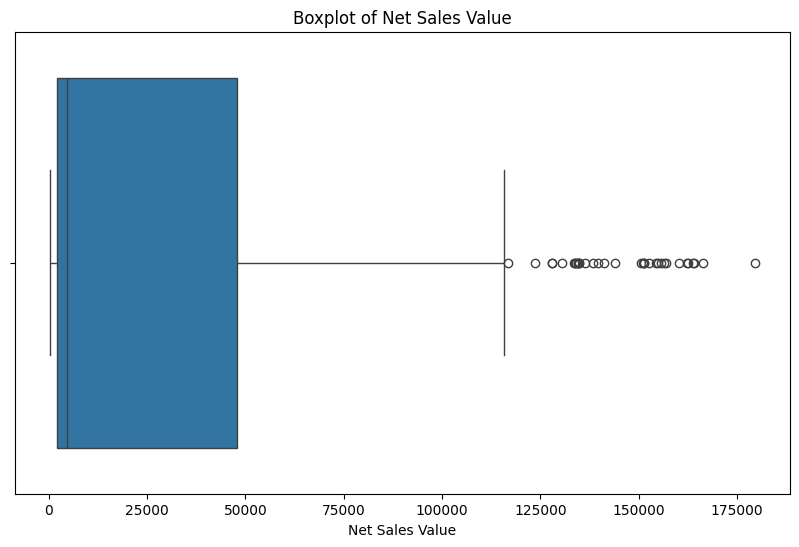

In [14]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

In [ ]:
#Identify categorical columns

In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [ ]:
## Create bar charts for categorical columns

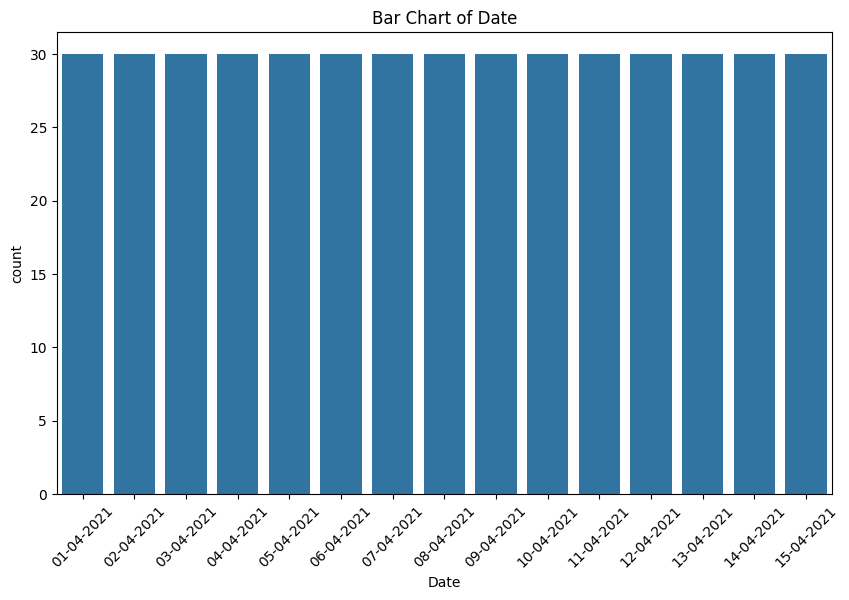

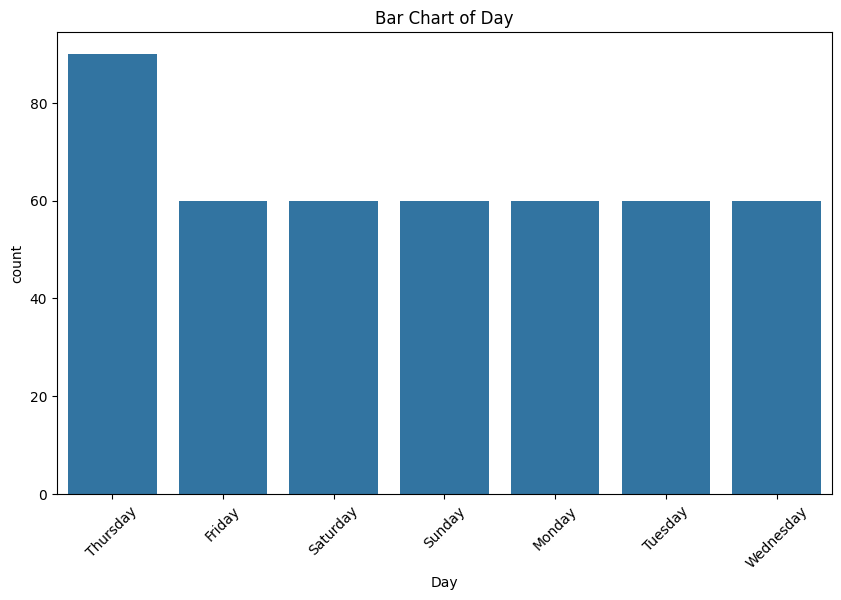

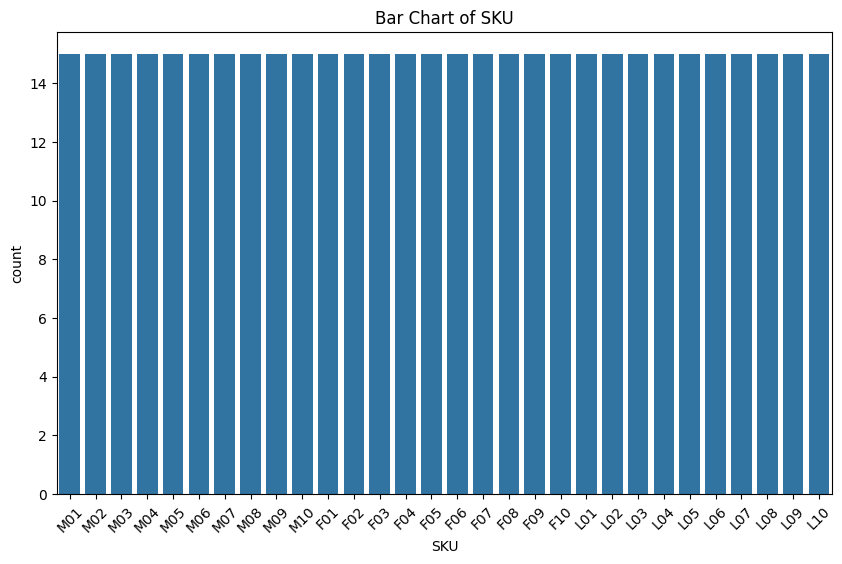

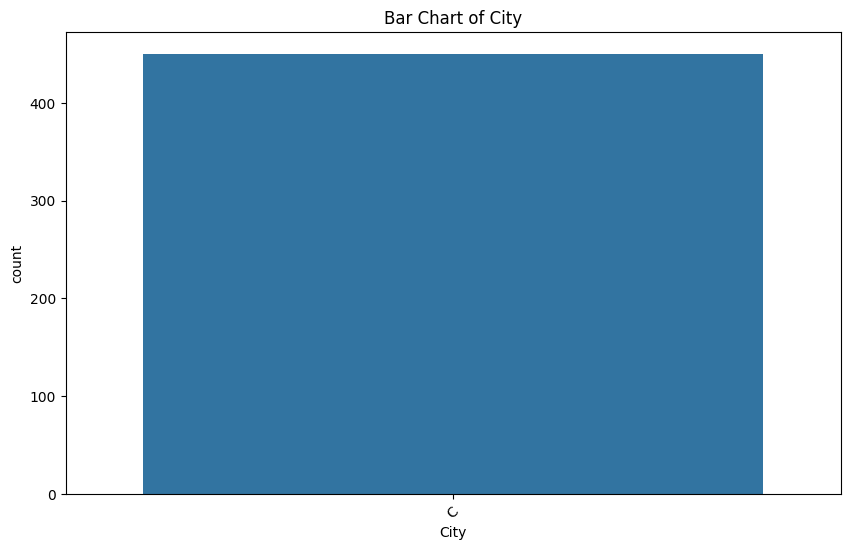

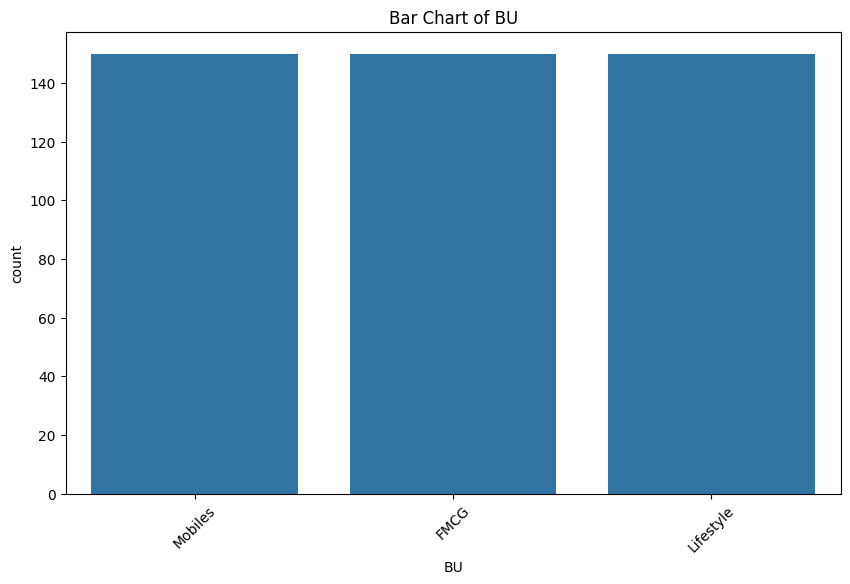

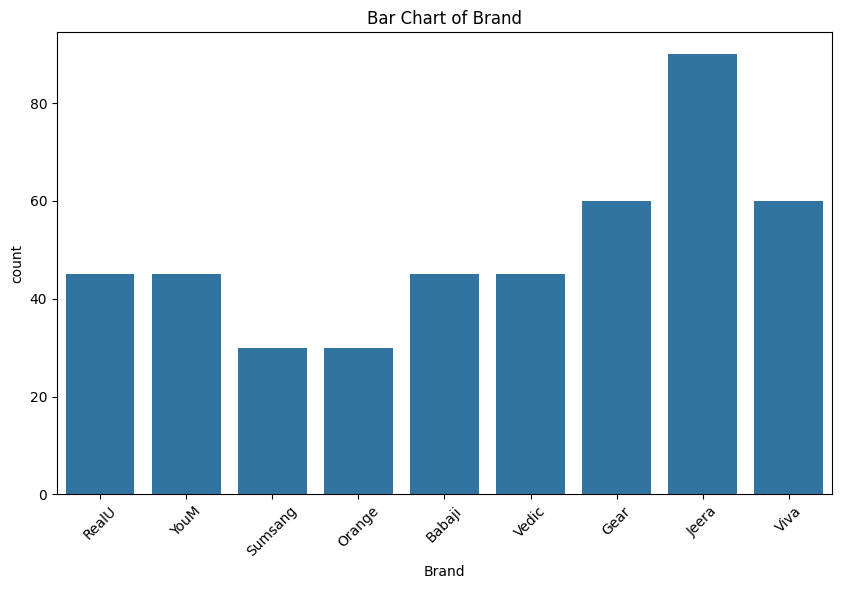

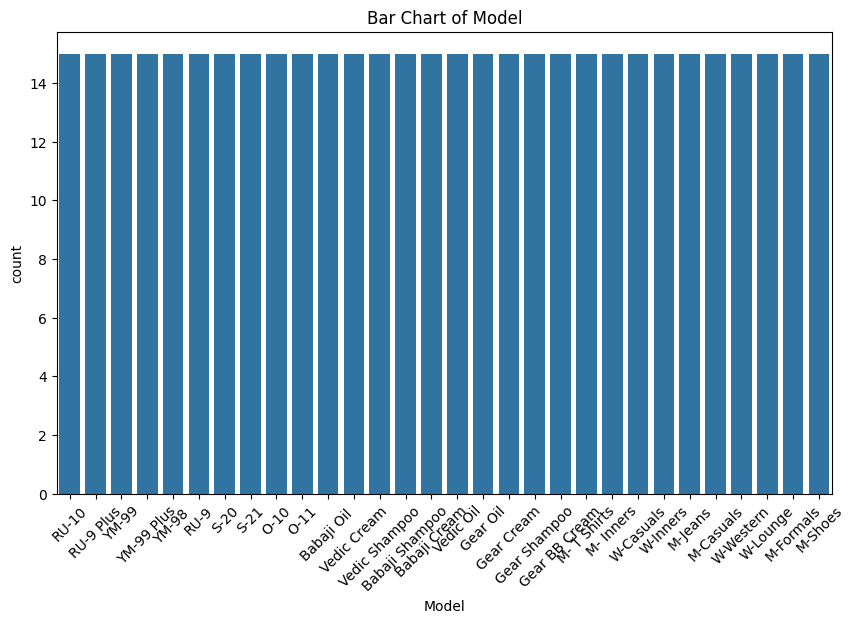

In [17]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[column])
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45)

In [18]:
plt.show()

In [19]:
from scipy.stats import zscore

In [ ]:
# Display summary statistics before standardization

In [20]:
print("Summary statistics before standardization:")
print(data[numerical_columns].describe())


Summary statistics before standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%  

In [ ]:
# Apply standardization (z-score normalization)

In [21]:
df_standardized = data.copy()
df_standardized[numerical_columns] = df_standardized[numerical_columns].apply(zscore)



In [ ]:
# Display summary statistics after standardization

In [22]:
print("\nSummary statistics after standardization:")
print(df_standardized[numerical_columns].describe())



Summary statistics after standardization:
             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   6.118562e-17  3.157968e-17       1.578984e-17      -3.552714e-17   
std    1.001113e+00  1.001113e+00       1.001113e+00       1.001113e+00   
min   -9.620925e-01 -5.627654e-01      -6.619170e-01      -2.406935e+00   
25%   -4.889322e-01 -5.530754e-01      -6.163534e-01      -2.823066e-01   
50%   -2.523521e-01 -4.985344e-01      -5.569226e-01       3.374180e-01   
75%    2.208081e-01 -1.957016e-02       3.840648e-01       7.019781e-01   
max    6.135311e+00  2.749009e+00       3.220894e+00       1.147360e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.526444e-17     1.973730e-17  
std       1.001113e+00     1.001113e+00  
min      -7.275032e-01    -6.508581e-01  
25%      -6.406462e-01    -6.103625e-01  
50%      -5.233349e-01    -5.

In [ ]:
#  Apply one-hot encoding to categorical columns

In [23]:
df_encoded = pd.get_dummies(df_standardized, columns=categorical_columns, drop_first=True)

In [24]:
# Display a portion of the transformed dataset
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
print("Conclusion:")
print("""
- Boxplots revealed the presence of outliers in several numerical columns, indicating extreme values that might require further investigation.
- Bar chart analysis provided insights into the distribution of categorical variables, showing the frequency of each category.
- Standardization was necessary to bring numerical variables to a common scale, which is crucial for models sensitive to the scale of data.
- One-hot encoding transformed categorical variables into a format suitable for machine learning algorithms, enabling their use in predictive modeling.
- These preprocessing steps ensure that the dataset is ready for subsequent analysis, improving model performance and interpretability.
""")

Conclusion:

- Boxplots revealed the presence of outliers in several numerical columns, indicating extreme values that might require further investigation.
- Bar chart analysis provided insights into the distribution of categorical variables, showing the frequency of each category.
- Standardization was necessary to bring numerical variables to a common scale, which is crucial for models sensitive to the scale of data.
- One-hot encoding transformed categorical variables into a format suitable for machine learning algorithms, enabling their use in predictive modeling.
- These preprocessing steps ensure that the dataset is ready for subsequent analysis, improving model performance and interpretability.

